In [ ]:
'''Performing linear regression on height-weight dataset'''

In [2]:
#!pip install gspread

In [3]:
import pandas as pd
import gspread

In [6]:
gc = gspread.service_account("C:\\Users\\sharm\\Downloads\\test1-378205-6a4268d6ec98.json")

In [7]:
gc

In [8]:
sheet=gc.open_by_url('https://docs.google.com/spreadsheets/d/1BSh8qnmgkbMEXcJ3Yv8Gu-JbrjWcLe-LKn03s9b_qM8/edit?usp=sharing')

In [9]:
sheet

<Spreadsheet 'Height-Weight Data' id:1BSh8qnmgkbMEXcJ3Yv8Gu-JbrjWcLe-LKn03s9b_qM8>

In [10]:
work_sheet = sheet.worksheet('Height-Weight Data') # importing data sets using google sheet

In [11]:
work_sheet

<Worksheet 'Height-Weight Data' id:114056496>

In [12]:
df = pd.DataFrame(work_sheet.get_all_records()) # creating a data frame

In [13]:
df.head() # just looking at the first five values out of thousands values from the datas using head function 

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [14]:
import numpy as npy
from matplotlib import pyplot as plt

import warnings as wr
wr.filterwarnings('ignore') # will ignore warnings

Text(0.5, 1.0, 'Height weight values')

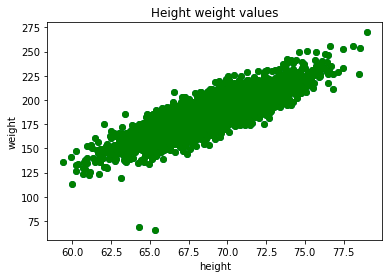

In [18]:
plt.scatter(df.Height,df.Weight) # scatter plot using all the height-weight values
plt.scatter(df.Height,df.Weight, color='green') 
plt.xlabel('height')
plt.ylabel('weight')
plt.title('Height weight values')

In [27]:
hgt=df.drop('Weight',axis=1) # seperating height (x) values and keeping it inside hgt

In [28]:
hgt.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [29]:
wgt=df['Weight'] #seperating weight (y) values and keeping it inside wgt

In [30]:
wgt.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [ ]:
'''using train_test_split(), seperating training and testing datas, 75% is used in training whereas 25% is used in testing
'''

In [37]:
from sklearn.model_selection import train_test_split
hgt_train,hgt_test,wgt_train,wgt_test = train_test_split(hgt,wgt,test_size=0.25,random_state=1) #75% is used in training

In [38]:
hgt_train.head() #will show five training values of height

,Height
525,68.624063
1792,68.829216
3314,69.197548
1562,67.867665
3086,65.234102


In [39]:
wgt_train.head() #will show five training values of weight

525     159.862467
1792    200.330819
3314    191.542329
1562    168.817572
3086    167.372980
Name: Weight, dtype: float64

In [ ]:
'''we will now perform linear regression using training and testing datasets'''

In [40]:
from sklearn.linear_model import LinearRegression

In [56]:
lr=LinearRegression()

In [57]:
lr.fit(hgt_train,wgt_train) # using training data as an input to train the machine learning model

LinearRegression()

In [58]:
m=lr.coef_   #calculating slope

In [59]:
c=lr.intercept_ #calculating y-intercept

In [60]:
df['predicted_wgt']=lr.predict(hgt) #predicting weight (y) values diretly (without using m and c) for all height (x) values

In [62]:
df['predicted_wgt'].head()

0    215.614865
1    185.372306
2    217.185702
3    202.980513
4    191.939493
Name: predicted_wgt, dtype: float64

In [63]:
#plt.plot(hgt.squeeze(),df[['predicted_wgt']]) # will use plt.plot(x.squeeze(),df[['predicted_rent']]) 

In [67]:
df[['predicted_wgt']].shape # size of predicted weight

(3501, 1)

In [65]:
hgt.shape # size of height

(3501, 1)

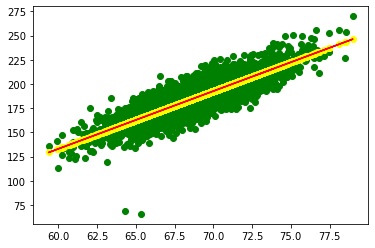

In [95]:
plt.scatter(hgt,df[['Weight']],color='green') # scatter plot with the original height weight values
plt.scatter(hgt,df[['predicted_wgt']],color='yellow') # scatter plot using predicted weights and the original heights
plt.plot(hgt.squeeze(),df['predicted_wgt'],color='red')  # gives best fit line

In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(wgt_test,lr.predict(hgt_test)) # calculating mean squared error
mae = mean_absolute_error(wgt_test,lr.predict(hgt_test)) #calculating mean absolute error

In [98]:
mse

111.53431428776675

In [99]:
mae

8.226502913131542

In [100]:
lr.score(hgt_test,wgt_test) # checking accuracy

0.7370876521149996